# Problem Statement
`Link`-> https://www.drivendata.org/competitions/87/competition-image-classification-wildlife-conservation/


Welcome to Taï National Park, data scientists! In this challenge, your goal is to classify the species that appear in camera trap images collected by our research partners at the Wild Chimpanzee Foundation and the Max Planck Institute for Evolutionary Anthropology. As mentioned in the about page, camera traps are one of the best tools available to study and monitor wildlife populations, and the enormous amounts of data they provide can be used to track different species for conservation efforts—once they are processed.

Thanks to our partners, we have a trove of images from camera traps located in different sites around Taï National Park. There are seven types of critters captured in this set of images: birds, civets, duikers, hogs, leopards, other monkeys, and rodents. There are also images that contain no animals. Your job is to build a model that can help researchers predict whether an image contains one of these seven types of species. Let's predict!



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unrar x "/content/drive/MyDrive/CS517_Project/test_features.rar" -d "/content/drive/MyDrive/CS517_Project/ajay_augmented"
import os
import numpy as np

## Visualizing the data

In [ ]:
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/CS517_Project/train_labels.csv")
print(labels_csv.describe())

       antelope_duiker          bird         blank   civet_genet  \
count     16488.000000  16488.000000  16488.000000  16488.000000   
mean          0.150049      0.099527      0.134219      0.146955   
std           0.357130      0.299377      0.340898      0.354072   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max           1.000000      1.000000      1.000000      1.000000   

                hog       leopard  monkey_prosimian        rodent  
count  16488.000000  16488.000000      16488.000000  16488.000000  
mean       0.059316      0.136705          0.151140      0.122089  
std        0.236222      0.343547          0.358196      0.327398  
min        0.000000      0.000000          0.000000      0.000000  
25%        0.000000      0.000000          0.00

In [ ]:
labels_csv.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
features_csv=pd.read_csv("/content/drive/MyDrive/CS517_Project/train_features.csv")

In [ ]:
features_csv.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [ ]:
features_csv.shape

(16488, 3)

In [ ]:
labels_csv.shape

(16488, 9)

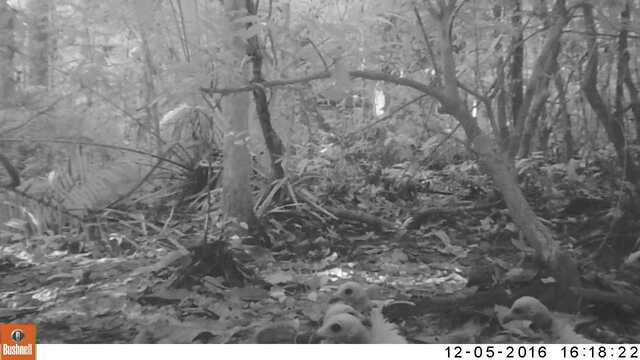

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/CS517_Project/train_features/ZJ000002.jpg")

In [ ]:
# import os
# import random
# import numpy as np

# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image as img_util
# from keras.preprocessing import image
# from tensorflow.keras.utils import load_img,img_to_array

# # Set the path to your "happy" folder
# data_path = "/content/drive/MyDrive/CS517_Project/train_features"
# data_path_2="/content/drive/MyDrive/CS517_Project/augmented_train_features"
# # Create an ImageDataGenerator instance to perform image augmentation
# datagen = ImageDataGenerator(
#     rotation_range=5,     # Randomly rotate the image up to 20 degrees
#     width_shift_range=0.2, # Randomly shift the image horizontally up to 20% of its width
#     height_shift_range=0.2,# Randomly shift the image vertically up to 20% of its height
#     shear_range=0.2,       # Randomly shear the image up to 20%
#     zoom_range=0.4,        # Randomly zoom the image up to 20%
#     horizontal_flip=True,  # Randomly flip the image horizontally
#     fill_mode="nearest"    # Fill in any empty pixels with the nearest value
# )

# # Loop through each image file in the "happy" folder and apply image augmentation
# for img_file in os.listdir(data_path):
#     if img_file.endswith(".jpg") or img_file.endswith(".jpeg") or img_file.endswith(".png"):
#         # Load the image
#         img = load_img(os.path.join(data_path, img_file))
#         # Convert the image to a numpy array
#         img_arr = img_to_array(img)
#         # Add a dimension to the array to make it compatible with the ImageDataGenerator
#         img_arr = np.expand_dims(img_arr, axis=0)
#         # Apply image augmentation and generate 5 new images
#         i = 0
#         for batch in datagen.flow(img_arr, batch_size=1, save_to_dir=data_path_2, save_prefix="augmented_" + img_file.split(".")[0], save_format="jpeg"):
#             i += 1
#             if i > 3: # Generate 5 augmented images for each original image
#                 break


## Getting image and their labels

Let's get a list of all image path names

In [ ]:
files=[fname for fname in labels_csv["id"]+".jpg"]

In [ ]:
filenames=[]
for i in range(16488):
  filenames.append("/content/drive/MyDrive/CS517_Project/train_features/"+files[i])
  # filenames.append("/content/drive/MyDrive/CS517_Project/ajay_augmented/IMAGES/"+files[i])

In [ ]:
len(filenames)

16488

Getting label for each image

In [ ]:
labels=[]
for i in range(len(labels_csv)):
  if(labels_csv["antelope_duiker"][i]==1.0):
    labels.append("antelope_duiker")
  elif(labels_csv["bird"][i]==1.0):
    labels.append("bird")
  elif(labels_csv["blank"][i]==1.0):
    labels.append("blank")
  elif(labels_csv["civet_genet"][i]==1.0):
    labels.append("civet_genet")
  elif(labels_csv["hog"][i]==1.0):
    labels.append("hog")
  elif(labels_csv["leopard"][i]==1.0):
    labels.append("leopard")
  elif(labels_csv["monkey_prosimian"][i]==1.0):
    labels.append("monkey_prosimian")
  elif(labels_csv["rodent"][i]==1.0):
    labels.append("rodent")

In [ ]:
labels=np.array(labels)

In [ ]:
labels.size,len(filenames)

(16488, 16488)

In [ ]:
unique_animals=np.unique(labels)
unique_animals

array(['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog',
       'leopard', 'monkey_prosimian', 'rodent'], dtype='<U16')

### Converting labels into boolean format

In [ ]:
boolean_labels=[label==unique_animals for label in labels]
# boolean_augmented_labels=[label==unique_animals for label in labels_augment]
print(labels[10])
print(boolean_labels[10].astype(int))
print(boolean_labels[10].argmax())

leopard
[0 0 0 0 0 1 0 0]
5


In [ ]:
len(boolean_labels)

16488

## Let's prepare our dataset to train the model

In [ ]:
X=filenames
y=boolean_labels

In [ ]:
NUM_IMAGES=1000 #@param{type:"slider",min:100,max:1000}

# New Section

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE=224
def process_image(image_path):
  #read image
  image=tf.io.read_file(image_path)
  #turn jpeg image into tensors
  image=tf.image.decode_jpeg(image,channels=3)
  #normalise from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
#bj
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label

In [ ]:
# Define batch size of 32
BATCH_SIZE=32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  #if the data is test dataset, maay not have labels
  if(test_data):
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    #shuffling path name
    data=data.shuffle(buffer_size=len(X))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [ ]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_animals)
MODEL_URL="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"

In [ ]:
import tensorflow_hub as hub

In [ ]:
%load_ext tensorboard
import datetime
#func to build tb callback
def create_tensorboard_callback():
  #creating a log directory
  logdir=os.path.join("drive/My Drive/CS517_Project/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:",MODEL_URL)
  # base_model = hub.KerasLayer(model_url, trainable=False, input_shape=input_shape)
  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL,trainable=False), #input layer
                             tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                   activation="sigmoid") #output layer
                             ])
  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  #Build the model
  model.build(INPUT_SHAPE)
  return model

## Creating the model

In [ ]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 dense_1 (Dense)             (None, 8)                 8016      
                                                                 
Total params: 25,623,865
Trainable params: 8,016
Non-trainable params: 25,615,849
_________________________________________________________________


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

In [ ]:
NUM_EPOCHS=10 #@param {type:"slider",min:10,max:100,step:10}

In [ ]:
#create a data batch with full data set
full_data=create_data_batches(X,y)
len(X)

Create training data batches


16488

In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.bool, name=None))>

In [ ]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [ ]:
full_model_tensorboard=create_tensorboard_callback()
#no validation set now,so we can't monitor validation accuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

## It's time to train our data!

In [ ]:
#fie the full model to the full data
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
#create a func to save model
def save_model(model,suffix=None):
  #create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/CS517_Project/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5" #save format of model
  print(f"Saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(full_model,suffix="full-image-set-ResNet-v2-adam_temp")

Saving model to:/content/drive/MyDrive/CS517_Project/models/20230514-17211684084876-full-image-set-ResNet-v2-adam_temp.h5...


'/content/drive/MyDrive/CS517_Project/models/20230514-17211684084876-full-image-set-ResNet-v2-adam_temp.h5'

In [ ]:
 # function to load the trained model
def load_model(model_path):
  print(f"Loading saved model from:{model_path}...")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

## Evaluating our model on test dataset

In [ ]:
full_model=load_model('/content/drive/MyDrive/CS517_Project/models/20230514-17211684084876-full-image-set-ResNet-v2-adam_temp.h5')

Loading saved model from:/content/drive/MyDrive/CS517_Project/models/20230514-17211684084876-full-image-set-ResNet-v2-adam_temp.h5...


In [ ]:
# test_labels=pd.read_csv("/content/drive/MyDrive/CS517_Project/test_features.csv")
import os
test_path="/content/drive/MyDrive/CS517_Project/test_features/"
print(len(os.listdir(test_path)))
test_filenames=[test_path+fname for fname in os.listdir(test_path) if fname!=".DS_Store"]

4464


In [ ]:
ltest_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches


In [ ]:
test_predictions=full_model.predict(ltest_data,
                                           verbose=1)

140/140 [==============================] - 82s 559ms/step


In [ ]:
test_predictions[91]

array([9.3405241e-01, 7.7707142e-01, 8.9340621e-01, 1.8452591e-04,
       1.6168763e-01, 9.0357475e-02, 9.2899680e-01, 1.6539460e-01],
      dtype=float32)

In [ ]:
np.savetxt("drive/My Drive/CS517_Project/preds_array.csv",test_predictions,delimiter=",")

In [ ]:
test_predictions=np.loadtxt("drive/My Drive/CS517_Project/preds_array.csv",delimiter=",")
preds_df=pd.DataFrame(columns=["id"]+list(unique_animals))
# preds_df.head()

In [ ]:
test_predictions[91]

array([9.34052408e-01, 7.77071416e-01, 8.93406212e-01, 1.84525910e-04,
       1.61687627e-01, 9.03574750e-02, 9.28996801e-01, 1.65394604e-01])

In [ ]:
test_labels=pd.read_csv("/content/drive/MyDrive/CS517_Project/test_features.csv")
test_labels.head()
test_ids=test_labels["id"]
# test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [ ]:
#add the prediction probabilities to each dog breed column
preds_df[list(unique_animals)]=test_predictions
preds_df.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ016488,0.934546,0.083789,0.805368,0.042037,0.000266,0.002990,0.649924,0.293381
1,ZJ016489,0.520220,0.330626,0.439038,0.232813,0.185624,0.390916,0.511983,0.147424
2,ZJ016490,0.941435,0.141861,0.964339,0.080936,0.034870,0.390208,0.003681,0.008409
3,ZJ016491,0.991945,0.999145,0.819460,0.000315,0.000087,0.000046,0.946955,0.958724
4,ZJ016492,0.869781,0.849698,0.536647,0.000343,0.007664,0.004084,0.162586,0.899107


In [ ]:
preds_df.to_csv("drive/My Drive/CS517_Project/full_model_predictions_submission_5_mobilenetV2.csv",
                index=False)

## On custom data set

In [ ]:
loaded_full_model=load_model("/content/drive/MyDrive/CS517_Project/models/20230511-18051683828357-full-image-set-ResNet-v2-adam_temp.h5")

Loading saved model from:/content/drive/MyDrive/CS517_Project/models/20230511-18051683828357-full-image-set-ResNet-v2-adam_temp.h5...


In [ ]:
## Make predictions on custom image
import os
custom_path="/content/drive/MyDrive/CS517_Project/test_features/"
filenames=os.listdir(custom_path)[69:75]
custom_image_paths=[custom_path+fname for fname in os.listdir(custom_path)]
custom_image_paths=custom_image_paths[69:75]


In [ ]:
custom_data=create_data_batches(custom_image_paths,test_data=True)

Creating test data batches


In [ ]:
#make predictions on custom data
custom_preds=loaded_full_model.predict(custom_data)

1/1 [==============================] - 10s 10s/step


In [ ]:
# Turn prediction table into their respective label .
def get_pred_label(prediction_probabilities):
  return unique_animals[np.argmax(prediction_probabilities)]

In [ ]:
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

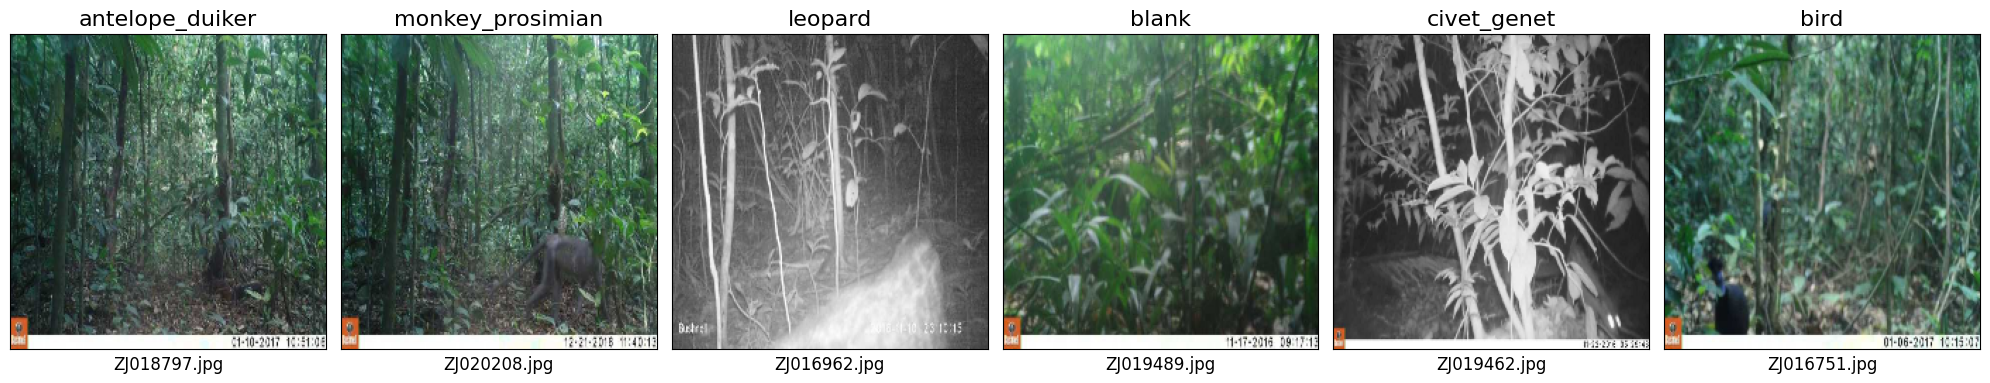

In [ ]:
import matplotlib.pyplot as plt
n = len(custom_preds)
fig, axes = plt.subplots(1, n, figsize=(20, 20))
plt.subplots_adjust(top=0.8)
for i, (image, pred_label, filename) in enumerate(zip(custom_images, custom_pred_labels, filenames)):
    axes[i].imshow(image)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(pred_label, fontsize=16)
    axes[i].set_xlabel(filename, fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir drive/MyDrive/CS517_Project/logs

Reusing TensorBoard on port 6006 (pid 2019), started 0:18:55 ago. (Use '!kill 2019' to kill it.)

<IPython.core.display.Javascript object>